In [285]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter('ignore')


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg' 


from pylab import rcParams
rcParams['figure.figsize'] = 8, 5


In [286]:
df = pd.read_csv('insurance.csv')



In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [288]:
print(df.shape)

(1338, 7)


In [289]:
def recode():
    df.replace('female',0,inplace=True)
    df.replace('male', 1, inplace=True)
    df.replace('yes', 1, inplace=True)
    df.replace('no',0,inplace=True)
    df.replace('southwest',1,inplace=True)
    df.replace('southeast', 2, inplace=True)
    df.replace('northwest', 3, inplace=True)
    df.replace('northeast', 4, inplace=True)


recode()
df['smoker'] = df['smoker'].astype(int)
df['sex'] = df['sex'].astype(int)
df['region'] = df['region'].astype(int)
df['bmi'] = df['bmi'].astype(float)

In [290]:

#for i in bmi:
   # if i > 25 : df['bmi'] = 2
        
   # elif 18<= i <=25: df['bmi'] = 1
        
   # else: df['bmi'] = 0
#df['bmi'].loc[(df['bmi'] > 18.0 ) & (df['bmi'] < 25.0 )] ='1.0'
#df['bmi'].loc[(df['bmi'] > 25.0 )] = '2.0'
#df['bmi'].loc[(df['bmi'] < 18.0 )] = '0.0'
lst = [df]

for col in lst:
    col.loc[col["bmi"] < 18.5, "bmi_new"] = "0"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 25), "bmi_new"] = "1"
    col.loc[col["bmi"] >= 25, "bmi_new"] = "2"
del df['bmi']
df['bmi_new'] = df['bmi_new'].astype(int)

In [291]:
df.head()

,age,sex,children,smoker,region,charges,bmi_new
0,19,0,0,1,1,16884.92400,2
1,18,1,1,0,2,1725.55230,2
2,28,1,3,0,2,4449.46200,2
3,33,1,0,0,3,21984.47061,1
4,32,1,0,0,3,3866.85520,2


In [292]:
df.loc[150:170, ('age', 'sex','bmi_new', 'smoker', 'charges')]

,age,sex,bmi_new,smoker,charges
150,35,1,1,0,5125.21570
151,48,1,2,0,7789.63500
152,32,0,2,0,6334.34355
153,42,0,1,1,19964.74630
154,40,0,2,0,7077.18940
155,44,1,2,0,6948.70080
156,48,1,1,1,21223.67580
157,18,1,2,1,15518.18025
158,30,1,2,1,36950.25670
159,50,0,2,0,19749.38338


In [293]:
#count smok & no_smok
yes_smok = len(df[df['smoker'] == 'yes']) #274
no_smok = len(df[df['smoker'] == 'no']) #1064
print (str(no_smok) + " Smok-")
print (str(yes_smok) + " Smok+")

0 Smok-
0 Smok+


In [294]:
columns_to_show = ['age', 'charges', 'bmi_new']

df.groupby(['smoker'])[columns_to_show].describe(percentiles=[])


age                                         charges                \
         count       mean        std   min   50%   max   count          mean   
smoker                                                                         
0       1064.0  39.385338  14.083410  18.0  40.0  64.0  1064.0   8434.268298   
1        274.0  38.514599  13.923186  18.0  38.0  64.0   274.0  32050.231832   

                                                           bmi_new            \
                 std         min          50%          max   count      mean   
smoker                                                                         
0        5993.781819   1121.8739   7345.40530  36910.60803  1064.0  1.807331   
1       11541.547176  12829.4551  34456.34845  63770.42801   274.0  1.781022   

                                 
             std  min  50%  max  
smoker                           
0       0.428854  0.0  2.0  2.0  
1       0.456381  0.0  2.0  2.0

In [295]:
columns_to_show = ['age', 'charges']

df.groupby(['smoker'])[columns_to_show].mean()

,age,charges
smoker,,
0,39.385338,8434.268298
1,38.514599,32050.231832


In [296]:
df.describe()

,age,sex,children,smoker,region,charges,bmi_new
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,1.094918,0.204783,2.484305,13270.422265,1.801943
std,14.049960,0.500160,1.205493,0.403694,1.104885,12110.011237,0.434588
min,18.000000,0.000000,0.000000,0.000000,1.000000,1121.873900,0.000000
25%,27.000000,0.000000,0.000000,0.000000,2.000000,4740.287150,2.000000
50%,39.000000,1.000000,1.000000,0.000000,2.000000,9382.033000,2.000000
75%,51.000000,1.000000,2.000000,0.000000,3.000000,16639.912515,2.000000
max,64.000000,1.000000,5.000000,1.000000,4.000000,63770.428010,2.000000


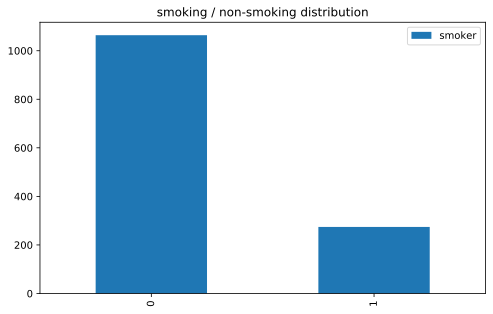

In [297]:
df['smoker'].value_counts().plot(kind='bar', label='smoker')
plt.legend()
plt.title('smoking / non-smoking distribution');

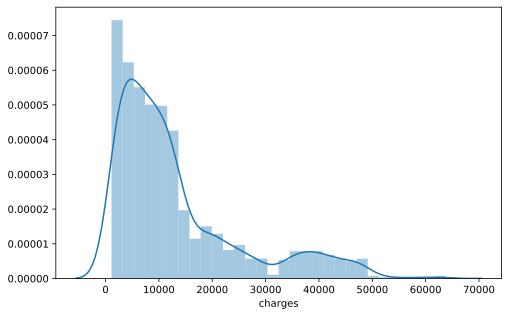

In [298]:
sns.distplot(df['charges'])



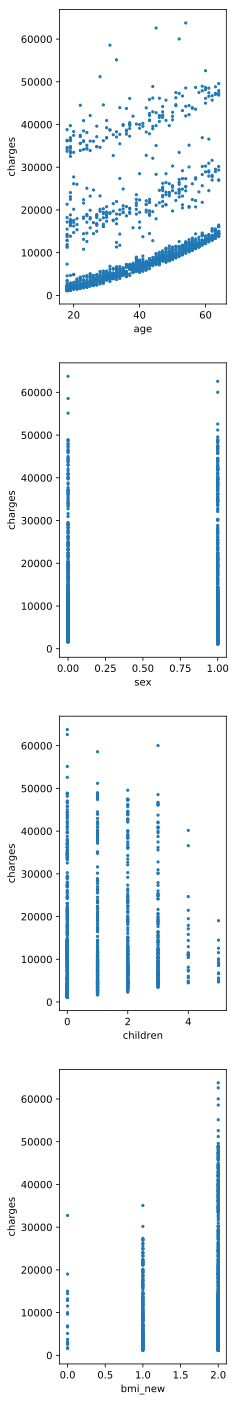

In [299]:
colnum=len(df.columns)-3
fig,ax=plt.subplots(colnum,1,figsize=(3,25))
ax[0].set_ylabel("charges")
p_vals={}
for ind,col in enumerate([i for i in df.columns if i not in ["smoker","region","charges"]]):
    
    ax[ind].scatter(df[col],df.charges,s=5)
    ax[ind].set_xlabel(col)
    ax[ind].set_ylabel("charges")    
plt.show()

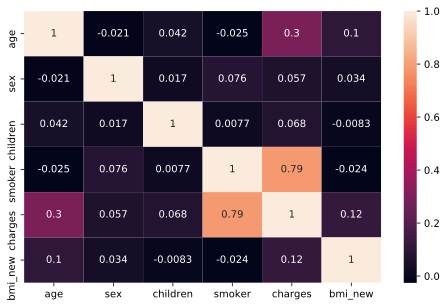

In [300]:
corr_matrix = df.drop(['region'], axis=1).corr()
sns.heatmap(corr_matrix, annot=True);


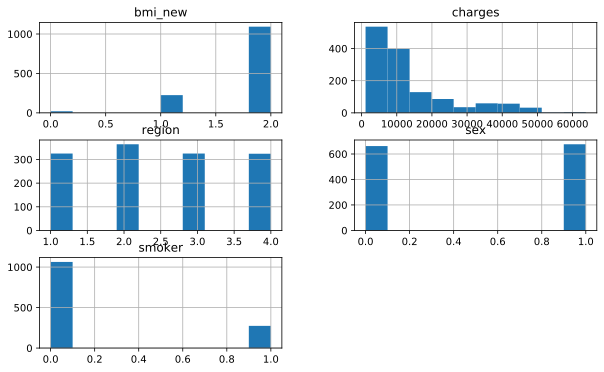

In [301]:
features = list(set(df.columns) - set(['age', 'children' ]))
                                     
df[features].hist(figsize=(10,6));



from the graphs we see that the overwhelming majority of the population suffers from overweight problems. task to identify what affects the amount of expenses more strongly a problem with body weight or smoking

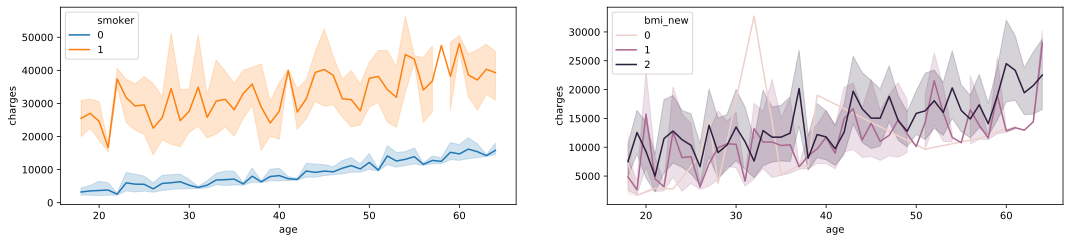

In [302]:
plt.rcParams["figure.figsize"]=(18,8)
plt.subplot(221)
sns.lineplot(x="age",y="charges",data=df,color="b",hue="smoker")

plt.subplot(222)
sns.lineplot(x="age",y="charges",data=df,color="g",hue="bmi_new")

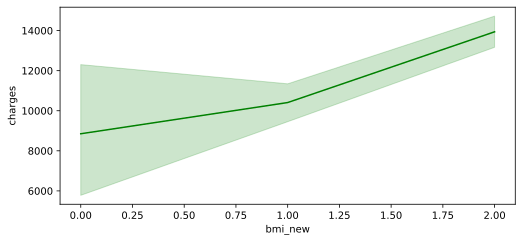

In [303]:
plt.subplot(222)
sns.lineplot(x="bmi_new",y="charges",data=df,color="g")

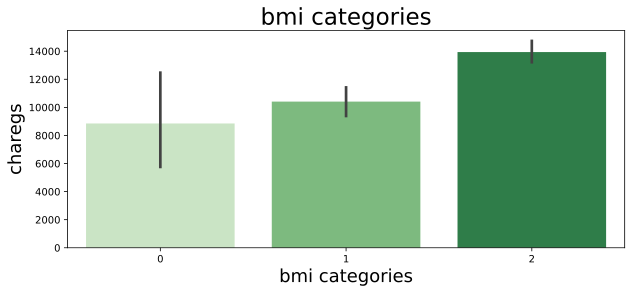

In [304]:
plt.figure(figsize=(10,4))
sns.barplot(x='bmi_new', y='charges', data=df, palette='Greens')
plt.title('bmi categories', size='23')
plt.ylabel('charegs',size=18)
plt.xlabel('bmi categories',size=18)
plt.show()

dividing the weight coefficient into categories, I saw that overweight increases the amount of health insurance

We see that smoking has a greater impact on spending.Based on the analysis, we see that two variables, smoker and bmi_new, affect the target variable "charges".
the cost of medical care significantly increases smoking than problems with overweight or underweight

summing up, we can say that if a person has problems with excess weight and smokes, he should be ready for cash costs